In [2]:
import gensim
import os
import codecs
import re
import string
from gensim.models import Word2Vec
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [4]:
# articles set from https://www.kaggle.com/nzalake52/new-york-times-articles

with open('nytimes_news_articles.txt', 'r') as f:
    contents = f.readlines()

In [5]:
articles = []
article = ''

for line in contents:
    if line[0:4] == 'URL:':
        if article != '':
            articles.append(article)
        article = ''
    else:
         article = article + line

In [6]:
len(articles)

8887

In [7]:
def words(text):
    regex = re.compile('[' + '–' + '—' + '”'+ re.escape(string.punctuation) + '0-9\\r\\t\\n]')   
    text = regex.sub(" ", text)
    words = text.split()
    wordsL = [word.lower() for word in words]
    return(wordsL)

In [8]:
ny_docs = []

for article in articles:
    ny_docs.append(words(article))

In [9]:
ny_docs[0][0:10]

['washington',
 'stellar',
 'pitching',
 'kept',
 'the',
 'mets',
 'afloat',
 'in',
 'the',
 'first']

In [10]:
frist_model = Word2Vec(ny_docs, min_count=1, size=300)

In [41]:
frist_model.wv.save_word2vec_format('ny_model.txt', binary=False)

In [42]:
result = frist_model.most_similar(positive=['man', 'genius'], negative=['woman'], topn=5)
print(result)

[('brilliant', 0.7613193988800049), ('legend', 0.7397980690002441), ('idol', 0.705564022064209), ('protagonist', 0.6986303329467773), ('“americana', 0.6782233715057373)]


In [43]:
from scipy.spatial.distance import cosine

def bais_genius(model):
    man_diff = cosine(model['man'], model['genius'])
    woman_diff = cosine(model['woman'], model['genius'])
    return man_diff - woman_diff

In [44]:
bais_genius(frist_model)

-0.0020801424980163574

In [13]:
wordcount = {}
for doc in ny_docs:
    for word in doc:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1

In [14]:
sorted(wordcount.items(), key=lambda x: x[1], reverse=True)[0:10]

[('the', 428535),
 ('a', 201760),
 ('to', 186441),
 ('of', 185737),
 ('and', 175764),
 ('in', 161618),
 ('that', 89300),
 ('for', 69650),
 ('on', 63186),
 ('is', 59341)]

In [47]:
ny_models_100 = [frist_model]

for i in range(99):
    ny_models_100.append(Word2Vec(ny_docs, min_count=1, size=300))

In [48]:
bais_genius_100 = []
for model in ny_models_100:
    bais_genius_100.append(bais_genius(model))

In [49]:
min(bais_genius_100)

-0.05099347233772278

In [50]:
max(bais_genius_100)

0.024115383625030518

In [53]:
np.std(bais_genius_100)

0.01759645712747362

In [55]:
np.mean(bais_genius_100)

-0.005465947687625885

(array([1., 0., 1., 1., 1., 3., 0., 3., 3., 1., 5., 4., 1., 2., 4., 6., 3.,
        6., 6., 6., 5., 5., 5., 8., 5., 2., 0., 4., 3., 6.]),
 array([-0.05099347, -0.04848984, -0.04598622, -0.04348259, -0.04097896,
        -0.03847533, -0.0359717 , -0.03346807, -0.03096444, -0.02846082,
        -0.02595719, -0.02345356, -0.02094993, -0.0184463 , -0.01594267,
        -0.01343904, -0.01093542, -0.00843179, -0.00592816, -0.00342453,
        -0.0009209 ,  0.00158273,  0.00408636,  0.00658998,  0.00909361,
         0.01159724,  0.01410087,  0.0166045 ,  0.01910813,  0.02161176,
         0.02411538]),
 <a list of 30 Patch objects>)

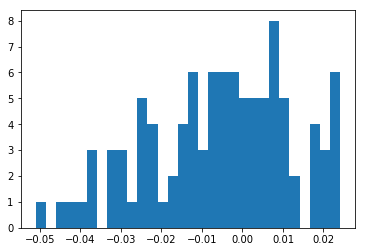

In [59]:
# Distribution of the amount of difference between each model's 
# distance between vectors for man and genius vs woman and genius (200 models)
from matplotlib.pyplot import hist

hist(bais_genius_100, bins=30)

In [60]:
with open('ny_bais_genius.txt', 'w') as f:
    for bais in bais_genius_100:
        f.write(str(bais))
        f.write("\n")

In [64]:
women_diffs = []
for i in range(100):
    for j in range(100):
        if i != j:
            women_diffs.append(cosine(ny_models_100[i]['women'], ny_models_100[j]['women']))

In [65]:
min(women_diffs)

0.0623164176940918

In [66]:
max(women_diffs)

0.4752131700515747

In [67]:
np.std(women_diffs)

0.051596714613036346

In [68]:
np.mean(women_diffs)

0.24107247485054864

(array([  18.,   44.,  100.,   76.,  154.,  172.,  226.,  254.,  238.,
         402.,  562.,  990., 1306., 1392., 1184., 1012.,  662.,  428.,
         280.,  176.,   96.,   44.,   44.,   26.,    4.,    2.,    4.,
           2.,    0.,    2.]),
 array([0.06231642, 0.07607964, 0.08984287, 0.10360609, 0.11736932,
        0.13113254, 0.14489577, 0.15865899, 0.17242222, 0.18618544,
        0.19994867, 0.21371189, 0.22747512, 0.24123834, 0.25500157,
        0.26876479, 0.28252802, 0.29629124, 0.31005447, 0.32381769,
        0.33758092, 0.35134414, 0.36510737, 0.37887059, 0.39263382,
        0.40639704, 0.42016027, 0.43392349, 0.44768672, 0.46144994,
        0.47521317]),
 <a list of 30 Patch objects>)

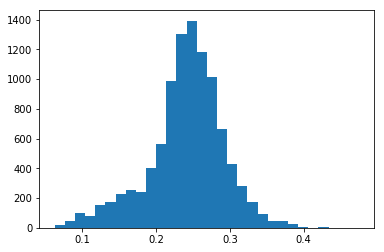

In [70]:
hist(women_diffs, bins=30)

In [71]:
def bais_genius_plural(model):
    man_diff = cosine(model['men'], model['genius'])
    woman_diff = cosine(model['women'], model['genius'])
    return man_diff - woman_diff

In [72]:
bais_genius_plural_100 = []
for model in ny_models_100:
    bais_genius_plural_100.append(bais_genius_plural(model))

In [73]:
min(bais_genius_plural_100)

-0.06560985185205936

In [75]:
min(bais_genius_plural_100) - min(bais_genius_100)

-0.014616379514336586

In [74]:
max(bais_genius_plural_100)

0.041749466210603714

In [76]:
max(bais_genius_plural_100) - max(bais_genius_100)

0.017634082585573196

In [77]:
np.std(bais_genius_plural_100)

0.019172662453379744

In [78]:
np.std(bais_genius_plural_100) - np.std(bais_genius_100)

0.0015762053259061222

In [79]:
np.mean(bais_genius_plural_100)

0.0031409794092178344

In [80]:
np.mean(bais_genius_plural_100) - np.mean(bais_genius_100)

0.00860692709684372

(array([ 1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  1.,  5.,  2.,
         6.,  7.,  6.,  5.,  5.,  5.,  4.,  7., 10.,  8.,  9.,  4.,  6.,
         2.,  2.,  0.,  3.]),
 array([-0.06560985, -0.06203121, -0.05845256, -0.05487392, -0.05129528,
        -0.04771663, -0.04413799, -0.04055934, -0.0369807 , -0.03340206,
        -0.02982341, -0.02624477, -0.02266612, -0.01908748, -0.01550884,
        -0.01193019, -0.00835155, -0.0047729 , -0.00119426,  0.00238438,
         0.00596303,  0.00954167,  0.01312031,  0.01669896,  0.0202776 ,
         0.02385625,  0.02743489,  0.03101353,  0.03459218,  0.03817082,
         0.04174947]),
 <a list of 30 Patch objects>)

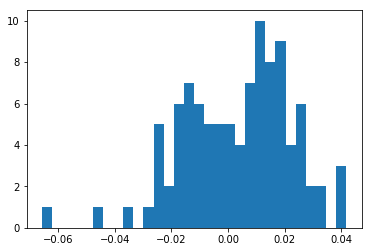

In [81]:
hist(bais_genius_plural_100, bins=30)

In [82]:
woman_diffs = []
for i in range(100):
    for j in range(100):
        if i != j:
            woman_diffs.append(cosine(ny_models_100[i]['woman'], ny_models_100[j]['woman']))

In [83]:
max(woman_diffs)

0.5091082453727722

In [84]:
max(woman_diffs) - max(women_diffs)

0.03389507532119751

In [85]:
min(woman_diffs)

0.045577168464660645

In [86]:
np.std(woman_diffs)

0.05595145826099913

In [87]:
np.mean(woman_diffs)

0.26088964064915976

In [88]:
# social has a word count of 1952
social_diffs = []
for i in range(100):
    for j in range(100):
        if i != j:
            social_diffs.append(cosine(ny_models_100[i]['social'], ny_models_100[j]['social']))

(array([  12.,   26.,   42.,   50.,   72.,   88.,  104.,  152.,  164.,
         224.,  274.,  408.,  618.,  842., 1012., 1068., 1086.,  974.,
         856.,  654.,  414.,  286.,  218.,  124.,   60.,   40.,   12.,
          14.,    4.,    2.]),
 array([0.06806856, 0.07809333, 0.08811809, 0.09814286, 0.10816762,
        0.11819238, 0.12821715, 0.13824191, 0.14826668, 0.15829144,
        0.16831621, 0.17834097, 0.18836573, 0.1983905 , 0.20841526,
        0.21844003, 0.22846479, 0.23848955, 0.24851432, 0.25853908,
        0.26856385, 0.27858861, 0.28861338, 0.29863814, 0.3086629 ,
        0.31868767, 0.32871243, 0.3387372 , 0.34876196, 0.35878672,
        0.36881149]),
 <a list of 30 Patch objects>)

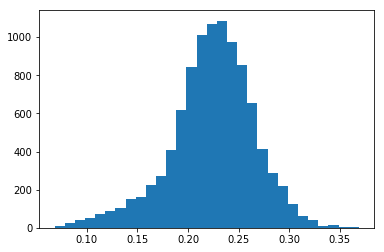

In [89]:
hist(social_diffs, bins=30)

In [90]:
# 'the' has a word count of 428535
the_diffs = []
for i in range(100):
    for j in range(100):
        if i != j:
            the_diffs.append(cosine(ny_models_100[i]['the'], ny_models_100[j]['the']))

(array([  10.,    8.,   22.,   26.,   50.,   48.,   54.,  122.,  114.,
         138.,  184.,  222.,  182.,  286.,  496.,  704.,  920., 1084.,
        1218., 1118.,  988.,  744.,  502.,  314.,  184.,   86.,   46.,
          18.,    6.,    6.]),
 array([0.11051917, 0.12250096, 0.13448276, 0.14646455, 0.15844634,
        0.17042814, 0.18240993, 0.19439172, 0.20637352, 0.21835531,
        0.2303371 , 0.2423189 , 0.25430069, 0.26628248, 0.27826428,
        0.29024607, 0.30222786, 0.31420966, 0.32619145, 0.33817324,
        0.35015504, 0.36213683, 0.37411862, 0.38610042, 0.39808221,
        0.410064  , 0.4220458 , 0.43402759, 0.44600938, 0.45799117,
        0.46997297]),
 <a list of 30 Patch objects>)

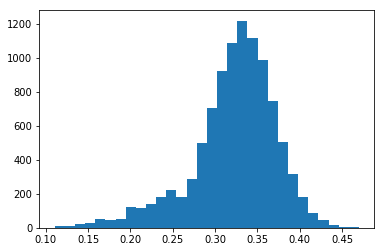

In [91]:
hist(the_diffs, bins=30)

In [92]:
sorted(wordcount.items(), key=lambda x: x[1], reverse=False)[0]

('micromanagement', 1)

In [93]:
micromanagement_diffs = []
for i in range(100):
    for j in range(100):
        if i != j:
            micromanagement_diffs.append(cosine(ny_models_100[i]['micromanagement'], ny_models_100[j]['micromanagement']))

(array([  4.,   8.,   4.,  46.,  50.,  96., 194., 304., 432., 590., 700.,
        860., 946., 972., 938., 828., 754., 570., 490., 350., 248., 182.,
        132.,  84.,  46.,  30.,  26.,  10.,   4.,   2.]),
 array([0.19343609, 0.21296803, 0.23249998, 0.25203193, 0.27156388,
        0.29109583, 0.31062778, 0.33015972, 0.34969167, 0.36922362,
        0.38875557, 0.40828752, 0.42781947, 0.44735141, 0.46688336,
        0.48641531, 0.50594726, 0.52547921, 0.54501116, 0.56454311,
        0.58407505, 0.603607  , 0.62313895, 0.6426709 , 0.66220285,
        0.6817348 , 0.70126674, 0.72079869, 0.74033064, 0.75986259,
        0.77939454]),
 <a list of 30 Patch objects>)

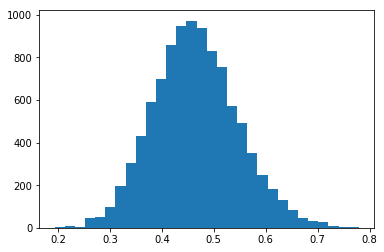

In [94]:
hist(micromanagement_diffs, bins=30)

In [106]:
sorted(wordcount.items(), key=lambda x: x[1], reverse=False)[100000]

('unionized', 16)

In [107]:
# 'unionized', 16

unionized_diffs = []
for i in range(100):
    for j in range(100):
        if i != j:
            unionized_diffs.append(cosine(ny_models_100[i]['unionized'], ny_models_100[j]['unionized']))

(array([  14.,   44.,   54.,  108.,  148.,  182.,  284.,  366.,  496.,
         710.,  790.,  946.,  940., 1012.,  840.,  772.,  672.,  530.,
         384.,  234.,  148.,   92.,   40.,   38.,   30.,   12.,    2.,
           4.,    2.,    6.]),
 array([0.1210584 , 0.13174947, 0.14244053, 0.15313159, 0.16382265,
        0.17451372, 0.18520478, 0.19589584, 0.20658691, 0.21727797,
        0.22796903, 0.23866009, 0.24935116, 0.26004222, 0.27073328,
        0.28142434, 0.29211541, 0.30280647, 0.31349753, 0.32418859,
        0.33487966, 0.34557072, 0.35626178, 0.36695284, 0.37764391,
        0.38833497, 0.39902603, 0.40971709, 0.42040816, 0.43109922,
        0.44179028]),
 <a list of 30 Patch objects>)

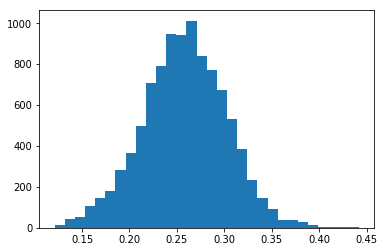

In [108]:
hist(unionized_diffs, bins=30)